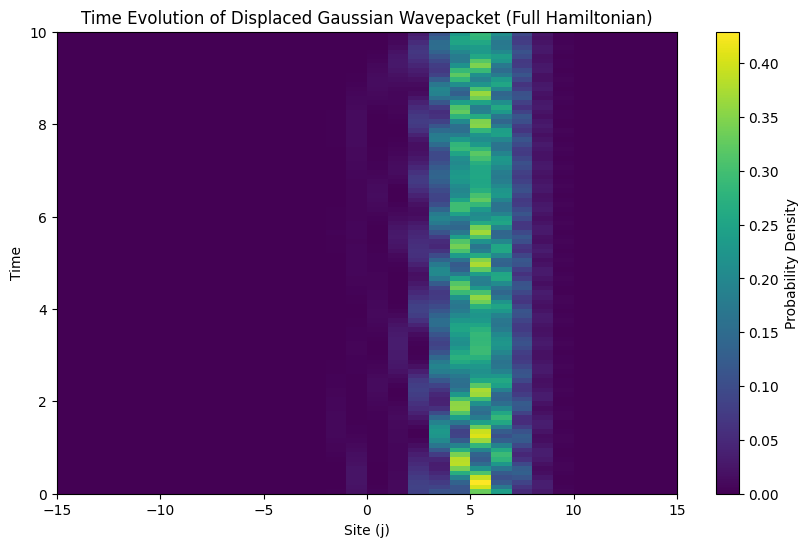

The expected oscillation frequency is: 0.1
The dominant frequency from the Fourier transform is: 0.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.fft import fft

# Parameters
N = 30  # Choose N > 20
V0 = 1.0
omega = 0.1
J = 1.0
h_bar = 1.0

# Full Hamiltonian
def H_full(t):
    # Hopping term
    hopping_term = -J * (np.roll(np.eye(N), 1, axis=0) + np.roll(np.eye(N), -1, axis=0))

    # Potential term with time-dependent cosine
    potential_term = V0 * np.cos(omega * t) * np.diag(np.arange(-N//2, N//2)**2)

    # Full Hamiltonian
    return hopping_term + potential_term

# Initial Gaussian wavepacket parameters
sigma = 2.0
k0 = 0.0
x = np.arange(-N//2, N//2)
psi0 = np.exp(-(x - k0)**2 / (2 * sigma**2)) / np.sqrt(np.sqrt(np.pi) * sigma)

# Time evolution
def evolve_full(psi, dt, steps):
    result = np.zeros((steps, len(psi)), dtype=complex)
    for t in range(steps):
        H_t = H_full(t * dt)
        U = expm(-1j * H_t * dt / h_bar)
        psi = np.dot(U, psi)
        result[t, :] = psi
    return result

# Displace the wavepacket from the center
displacement = 5
psi0 = np.roll(psi0, displacement)

# Time parameters
dt = 0.1
steps = 100

# Perform time evolution
result_full = evolve_full(psi0, dt, steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(result_full)**2, extent=[-N//2, N//2, 0, steps*dt], aspect='auto', cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Time Evolution of Displaced Gaussian Wavepacket (Full Hamiltonian)')
plt.xlabel('Site (j)')
plt.ylabel('Time')
plt.show()

# Fourier transform to find the dominant frequency
freqs = np.fft.fftfreq(steps, dt)
fft_result = fft(result_full[:, N//2])  # We are interested in the central site

# Find the dominant frequency
dominant_freq = np.abs(freqs[np.argmax(np.abs(fft_result))])

print(f"The expected oscillation frequency is: {omega}")
print(f"The dominant frequency from the Fourier transform is: {dominant_freq}")